# LIBRARIES

In [2]:
## import library
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import MeanShift
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

# purity score function

In [3]:
## calculate purity score
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    print(np.amax(contingency_matrix, axis=0), contingency_matrix)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

# LOAD DATASET

In [4]:
## read dataset and change to random
dataset = pd.read_csv ('..\\FinalDataSet.csv')
dataset = dataset.sample(frac=1).reset_index(drop=True)
# dataset

In [5]:
## delete id and label column
dataset_final = dataset.drop(columns=['id', 'label'])

## change all data to normal data
dataset_final_normal =(dataset_final-dataset_final.min())/(dataset_final.max()-dataset_final.min())
# dataset_final

# KMEANS ALGORITHM

labels 1 :  [0 0 0 ... 0 0 0]
center 1 :  [[ 6.46245007e+04 -3.38994756e+02  1.39982381e+02 -2.31517567e+01
   8.69119484e+00 -9.12276783e+00 -6.51911192e+00 -1.23190204e+01
  -6.86420488e+00 -9.80676443e+00 -9.20331291e+00 -7.38006480e+00
  -6.92214173e+00 -5.89191482e+00 -5.93774613e+00 -2.85806566e+00
  -4.61949054e+00 -3.79470663e+00 -2.96556297e+00 -1.06777502e+00
  -1.48256625e+00]]
num iteration 1 :  2
[263] [[256]
 [240]
 [241]
 [263]
 [232]
 [258]]
purity 1 :  0.17651006711409395


###########################################################################


labels 2 :  [1 1 0 ... 0 0 0]
center 2 :  [[ 4.88753837e+04 -3.52252918e+02  1.48521706e+02 -7.70158317e+00
   5.93927368e+00 -6.06310750e+00 -6.45140443e+00 -1.06542844e+01
  -7.20634020e+00 -9.70857204e+00 -9.12948124e+00 -7.93450295e+00
  -7.09272707e+00 -6.14300179e+00 -5.92869523e+00 -3.42800614e+00
  -4.86539647e+00 -4.17926531e+00 -3.27422889e+00 -1.59351101e+00
  -1.40961937e+00]
 [ 1.04220158e+05 -3.05661735e+02  

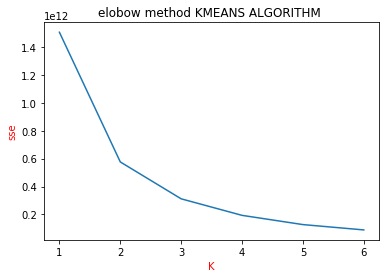

In [16]:
## Kmeans Algorithm

## prefix of path when export csv
output_path = "outputs/Kmeans/"
purity_kmeans = []
sse_kmeans = []
k_array = []

## k values = {1, 2, 3, 4, 5, 6}
for k in range(1,7):
    file_name = "kmeans_with_k_"+str(k)+".csv"
    
    ## create model and fit with data
    kmeans = KMeans(n_clusters=k, random_state=0).fit(dataset_final)
    print("labels",k,": ",kmeans.labels_)
    print("center",k,": ",kmeans.cluster_centers_)
    print("num iteration",k,": ",kmeans.n_iter_)
    output_kmeans = pd.DataFrame(kmeans.labels_, columns=["predicted"])
    output_kmeans['labels'] = dataset['label']
    output_kmeans.to_csv((output_path+file_name))
    purity_kmeans.append(purity_score(output_kmeans['labels'], output_kmeans['predicted']))
    print("purity",k,": ",purity_kmeans[k-1])
    
    cluster_centers = kmeans.cluster_centers_
    cluster_sse = 0
    for i in range(len(dataset_final)):
        point = dataset_final.iloc[i]
        label = kmeans.labels_[i]
        cluster_sse += np.square(point - cluster_centers[label]).sum()
    sse_kmeans.append(cluster_sse)
    k_array.append(k)
    print("\n")
    print("###########################################################################")
    print("\n")
print(purity_kmeans)
plt.title("elobow method KMEANS ALGORITHM ")
plt.xlabel("K",color="r")
plt.ylabel("sse",color="r")
plt.plot(k_array, sse_kmeans)

# HIERARCHICAL ALGORITHM

In [9]:
## Hierarchical Algorithm

## prefix of path when export csv
output_path = "outputs/Hierarchical/"
purity_hierarchical = []
sse_hierarchical = []
k_array = []

## k values = {1, 2, 3, 4, 5, 6}
for k in range(1,7):
    file_name = "hierarchical_with_k_"+str(k)+".csv"
    
    ## create model and fit with data
    ## linkage{‘ward’, ‘complete’, ‘average’, ‘single’}
    hierarchical = AgglomerativeClustering(n_clusters=k, affinity='cosine', linkage='average')
    hierarchical.fit_predict(dataset_final)
    print("labels",k,": ",hierarchical.labels_)
    
    output_hierarchical = pd.DataFrame(hierarchical.labels_, columns=["predicted"])
    output_hierarchical['labels'] = dataset['label']
    output_hierarchical.to_csv((output_path+file_name))
    purity_hierarchical.append(purity_score(output_hierarchical['labels'], output_hierarchical['predicted']))
    print("purity",k,": ",purity_hierarchical[k-1])
    print("\n")
    print("###########################################################################")
    print("\n")
    
    
print(purity_hierarchical)

labels 1 :  [0 0 0 ... 0 0 0]
[263] [[256]
 [240]
 [241]
 [263]
 [232]
 [258]]
purity 1 :  0.17651006711409395


###########################################################################


labels 2 :  [1 1 1 ... 1 1 1]
[ 83 259] [[  3 253]
 [ 83 157]
 [  2 239]
 [  4 259]
 [  1 231]
 [  4 254]]
purity 2 :  0.2295302013422819


###########################################################################


labels 3 :  [0 0 0 ... 0 0 0]
[259  81   2] [[253   3   0]
 [157  81   2]
 [239   2   0]
 [259   4   0]
 [231   1   0]
 [254   4   0]]
purity 3 :  0.2295302013422819


###########################################################################


labels 4 :  [3 3 3 ... 3 1 3]
[ 81 145   2 228] [[  3  32   0 221]
 [ 81 145   2  12]
 [  2  11   0 228]
 [  4  59   0 200]
 [  1  51   0 180]
 [  4  47   0 207]]
purity 4 :  0.30604026845637583


###########################################################################


labels 5 :  [3 3 3 ... 3 4 3]
[ 38  43   2 228 145] [[  1   2   0 221 

# DBSCAN ALGORITHM

In [10]:
## DBSCAN Algorithm

## create model and fit with data
dbscan = DBSCAN(eps=2, min_samples=3).fit(dataset_final_normal)
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# KMEDOIDS ALGORITHM

labels 1 :  [0 0 0 ... 0 0 0]
center 1 :  [[ 5.83910000e+04 -3.73743774e+02  1.22128181e+02 -4.03505754e+00
   9.11247921e+00 -3.05049348e+00  1.09038687e+01 -5.42010307e+00
   5.51560307e+00 -6.52385235e+00 -7.24082851e+00 -1.09333096e+01
  -9.41372395e+00 -7.05003452e+00 -6.14954853e+00 -5.54001331e+00
  -2.96894336e+00 -3.96263629e-01  2.83982968e+00  1.09083853e+01
   5.66143608e+00]]
num iteration 1 :  0
inertia 1 :  34998325.293999106
[263] [[256]
 [240]
 [241]
 [263]
 [232]
 [258]]
purity 1 :  0.17651006711409395


###########################################################################


labels 2 :  [1 1 0 ... 1 0 0]
center 2 :  [[ 4.64910000e+04 -3.79189178e+02  1.43435089e+02 -1.48527775e+01
   6.22154522e+00 -8.80571651e+00 -6.62169027e+00 -9.05966473e+00
  -6.34678078e+00 -7.44605637e+00 -1.27713318e+01 -1.22987709e+01
  -1.05200119e+01 -1.01269341e+01 -8.97790146e+00 -8.71970844e+00
  -1.22892141e+01 -9.09176350e+00 -1.47275963e+01 -1.12839270e+01
  -6.75346327e+00]
 [ 

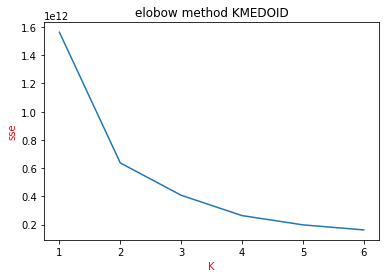

In [14]:
## Kmedoids Algorithm

## prefix of path when export csv
# output_path = "outputs/Kmedoids/"
purity_kmedoids = []
sse_kmedoids = []
k_array = []

## k values = {1, 2, 3, 4, 5, 6}
for k in range(1,7):
    # file_name = "kmedoids_with_k_"+str(k)+".csv"
    
    ## create model and fit with data
    kmedoids = KMedoids(n_clusters=k, random_state=0).fit(dataset_final)
    print("labels",k,": ",kmedoids.labels_)
    print("center",k,": ",kmedoids.cluster_centers_)
    print("num iteration",k,": ",kmedoids.n_iter_)
    print("inertia",k,": ",kmedoids.inertia_)

    output_kmedoids = pd.DataFrame(kmedoids.labels_, columns=["predicted"])
    output_kmedoids['labels'] = dataset['label']
    output_kmedoids.to_csv((output_path+file_name))
    purity_kmedoids.append(purity_score(output_kmedoids['labels'], output_kmedoids['predicted']))
    print("purity",k,": ",purity_kmedoids[k-1])
    
    cluster_centers = kmedoids.cluster_centers_
    cluster_sse = 0
    for i in range(len(dataset_final)):
        point = dataset_final.iloc[i]
        label = kmedoids.labels_[i]
        cluster_sse += np.square(point - cluster_centers[label]).sum()
    sse_kmedoids.append(cluster_sse)
    k_array.append(k)
    print("\n")
    print("###########################################################################")
    print("\n")
print(purity_kmedoids)
plt.title("elobow method KMEDOID")
plt.xlabel("K",color="r")
plt.ylabel("sse",color="r")
plt.plot(k_array, sse_kmedoids)

# MEANSHIFT ALGORITHM

labels 1 :  [0 0 0 ... 0 0 0]
center 1 :  [[0.17830635 0.52507293 0.53246682 0.47481565 0.59497199 0.48453931
  0.50759293 0.51446044 0.36275638 0.40875512 0.37921428 0.41071364
  0.39268574 0.41870002 0.42247607 0.40057883 0.4043413  0.36728773
  0.38527565 0.36476636 0.40693883]]
num iteration 1 :  6
[263] [[256]
 [240]
 [241]
 [263]
 [232]
 [258]]
purity 1 :  0.17651006711409395


###########################################################################


labels 2 :  [0 0 0 ... 0 0 0]
center 2 :  [[0.17597655 0.52324467 0.53625623 0.47908771 0.59365791 0.48620588
  0.50993618 0.51598624 0.36216634 0.40803166 0.37848439 0.40811067
  0.38990716 0.41541677 0.42081227 0.39851484 0.40346866 0.36661105
  0.38370984 0.36397472 0.40693377]]
num iteration 2 :  6
[263] [[256]
 [240]
 [241]
 [263]
 [232]
 [258]]
purity 2 :  0.17651006711409395


###########################################################################


labels 3 :  [0 0 0 ... 0 0 0]
center 3 :  [[0.17254178 0.52063553 0.54

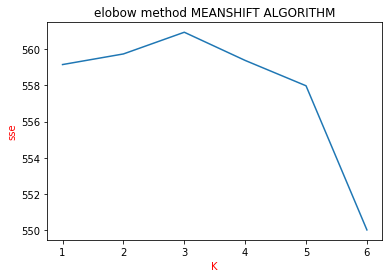

In [15]:
## Meanshift Algorithm

## prefix of path when export csv
output_path = "outputs/Meanshift/"
purity_mean_shift = []
sse_mean_shift = []
k_array = []
bandwidth = 0.95

## k values = {1, 2, 3, 4, 5, 6}
for k in range(1,7):
    file_name = "mean_shift_with_k_"+str(k)+".csv"
    
    ## create model and fit with data
    mean_shift = MeanShift(bandwidth=bandwidth).fit(dataset_final_normal)
    bandwidth = bandwidth-0.05
    print("labels",k,": ",mean_shift.labels_)
    print("center",k,": ",mean_shift.cluster_centers_)
    print("num iteration",k,": ",mean_shift.n_iter_)

    output_mean_shift = pd.DataFrame(mean_shift.labels_, columns=["predicted"])
    output_mean_shift['labels'] = dataset['label']
    output_mean_shift.to_csv((output_path+file_name))
    purity_mean_shift.append(purity_score(output_mean_shift['labels'], output_mean_shift['predicted']))
    print("purity",k,": ",purity_mean_shift[k-1])
    cluster_centers = mean_shift.cluster_centers_
    cluster_sse = 0
    for i in range(len(dataset_final_normal)):
        point = dataset_final_normal.iloc[i]
        label = mean_shift.labels_[i]
        cluster_sse += np.square(point - cluster_centers[label]).sum()
    sse_mean_shift.append(cluster_sse)
    k_array.append(k)
    print("\n")
    print("###########################################################################")
    print("\n")
print(purity_mean_shift)
plt.title("elobow method MEANSHIFT ALGORITHM")
plt.xlabel("K",color="r")
plt.ylabel("sse",color="r")
plt.plot(k_array, sse_mean_shift)
